<a href="https://www.kaggle.com/code/vanpatangan/diabetes-prediction-lgbm?scriptVersionId=288665989" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries and Data

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s5e12/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e12/test.csv")

# Data Overview

In [3]:
def check(df):
    """
    Generates a concise summary of DataFrame columns.
    """
    # Compute values that are constant across columns
    total_rows = len(df)
    duplicates = df.duplicated().sum()

    # Use vectorized operations 
    dtypes = df.dtypes
    instances = df.count()
    unique = df.nunique()
    sum_null = df.isnull().sum()
    #null_percentage = (df.isnull().sum() / total_rows * 100).round(2)

    # Create the summary 
    df_check = pd.DataFrame({
        'column': df.columns,
        'dtype': dtypes,
        'instances': instances,
        'unique': unique,
        'sum_null': sum_null,
        #'null_percentage': null_percentage,
        'duplicates': duplicates  
    })

    return df_check

print("Train Data")
display(check(train))
display(train.head())

print("Test Data")
display(check(test))
display(test.head())

Train Data


,column,dtype,instances,unique,sum_null,duplicates
id,id,int64,700000,700000,0,0
age,age,int64,700000,71,0,0
alcohol_consumption_per_week,alcohol_consumption_per_week,int64,700000,9,0,0
physical_activity_minutes_per_week,physical_activity_minutes_per_week,int64,700000,565,0,0
diet_score,diet_score,float64,700000,99,0,0
sleep_hours_per_day,sleep_hours_per_day,float64,700000,69,0,0
screen_time_hours_per_day,screen_time_hours_per_day,float64,700000,151,0,0
bmi,bmi,float64,700000,231,0,0
waist_to_hip_ratio,waist_to_hip_ratio,float64,700000,36,0,0
systolic_bp,systolic_bp,int64,700000,71,0,0


,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


Test Data


,column,dtype,instances,unique,sum_null,duplicates
id,id,int64,300000,300000,0,0
age,age,int64,300000,71,0,0
alcohol_consumption_per_week,alcohol_consumption_per_week,int64,300000,9,0,0
physical_activity_minutes_per_week,physical_activity_minutes_per_week,int64,300000,544,0,0
diet_score,diet_score,float64,300000,99,0,0
sleep_hours_per_day,sleep_hours_per_day,float64,300000,68,0,0
screen_time_hours_per_day,screen_time_hours_per_day,float64,300000,147,0,0
bmi,bmi,float64,300000,230,0,0
waist_to_hip_ratio,waist_to_hip_ratio,float64,300000,37,0,0
systolic_bp,systolic_bp,int64,300000,77,0,0


,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,...,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,...,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,...,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,...,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,...,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0


# Visualizations

## 1️⃣ Mean Separation Plot 
### Which numerical features separate diabetics from non-diabetics the most?

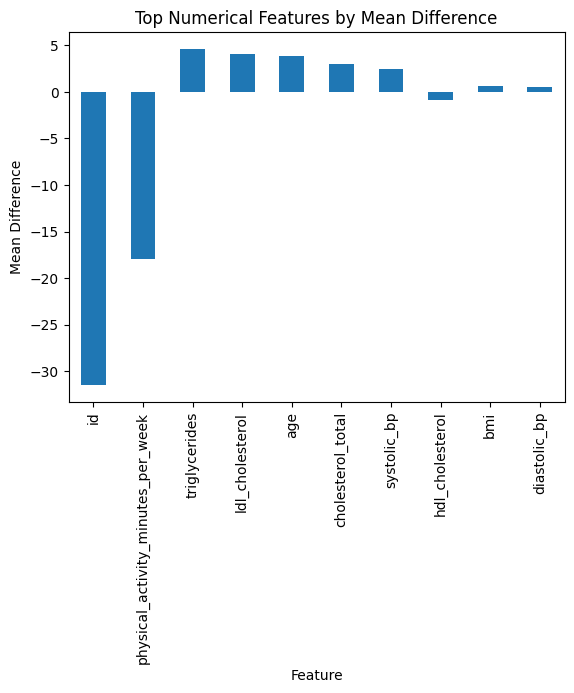

In [4]:
num_cols = train.select_dtypes(include=["int64", "float64"]).columns
num_cols = num_cols.drop("diagnosed_diabetes")

mean_diff = (
    train.groupby("diagnosed_diabetes")[num_cols]
    .mean()
    .T
)

mean_diff["diff"] = mean_diff[1.0] - mean_diff[0.0]
mean_diff = mean_diff.sort_values("diff", key=abs, ascending=False)

plt.figure()
mean_diff["diff"].head(10).plot(kind="bar")
plt.title("Top Numerical Features by Mean Difference")
plt.xlabel("Feature")
plt.ylabel("Mean Difference")
plt.show()

## 2️⃣ Boxplots of the strongest predictors
### Is the separation real or driven by outliers?

<Figure size 640x480 with 0 Axes>

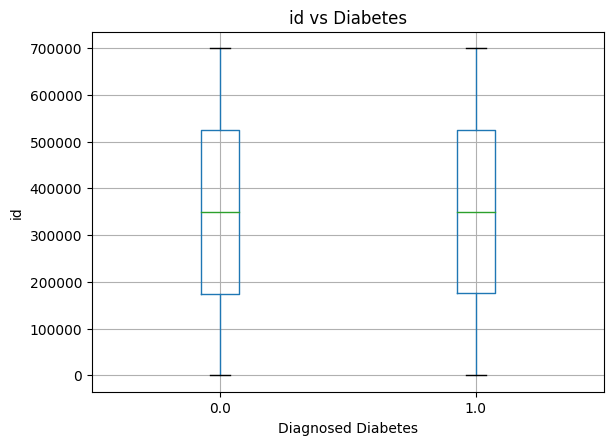

<Figure size 640x480 with 0 Axes>

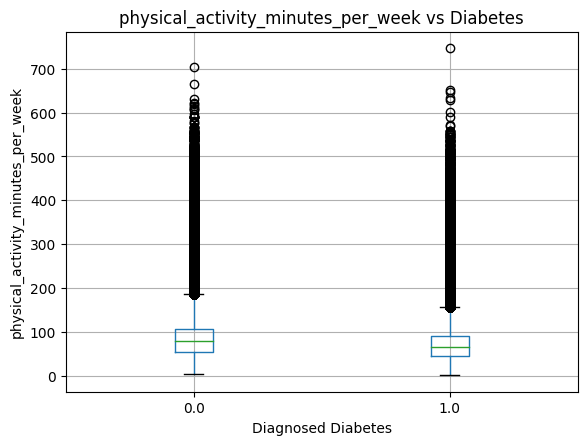

<Figure size 640x480 with 0 Axes>

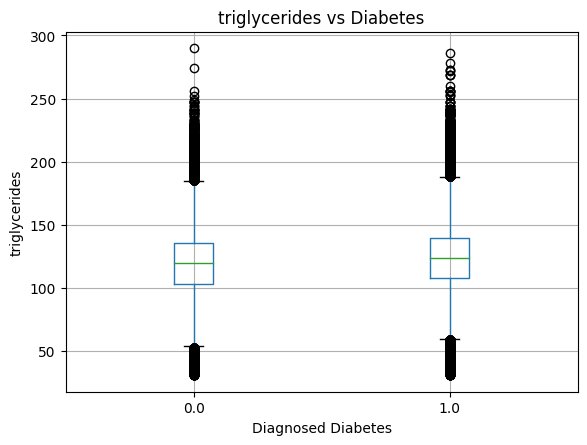

<Figure size 640x480 with 0 Axes>

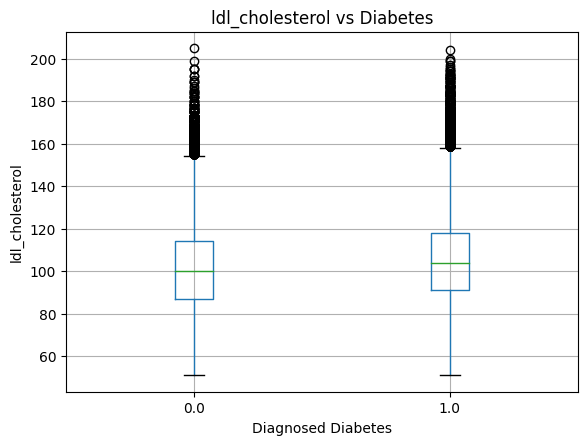

<Figure size 640x480 with 0 Axes>

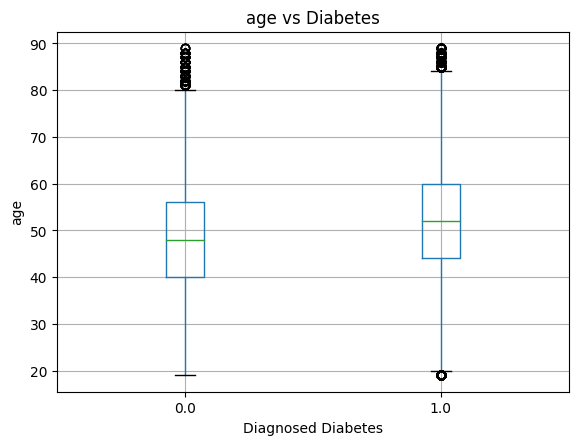

In [5]:
top_features = mean_diff.index[:5]

for col in top_features:
    plt.figure()
    train.boxplot(column=col, by="diagnosed_diabetes")
    plt.title(f"{col} vs Diabetes")
    plt.suptitle("")
    plt.xlabel("Diagnosed Diabetes")
    plt.ylabel(col)
    plt.show()

## 3️⃣ Correlation with target 
### Which features have direct relationship with diabetes?

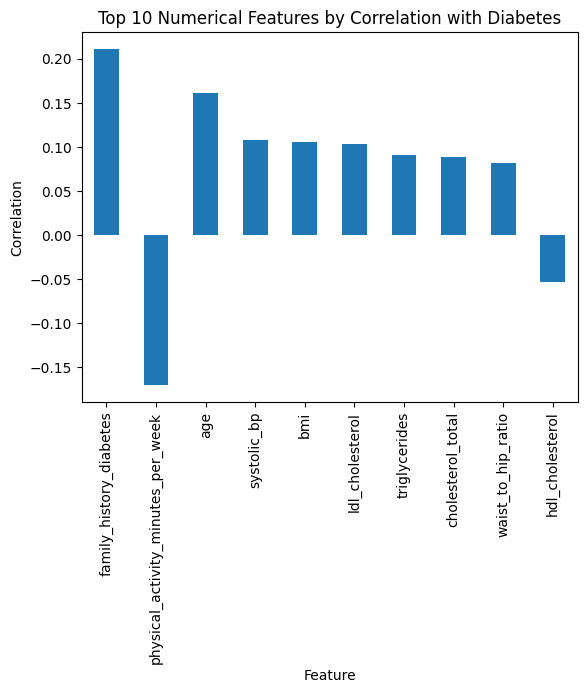

In [6]:
# Target column
y = train["diagnosed_diabetes"]

corr = train[num_cols].corrwith(y).sort_values(key=abs, ascending=False)

plt.figure()
corr.head(10).plot(kind="bar")
plt.title("Top 10 Numerical Features by Correlation with Diabetes")
plt.ylabel("Correlation")
plt.xlabel("Feature")
plt.show()

## 4️⃣ Categorical diabetes prevalence
### Which groups are structurally higher risk?

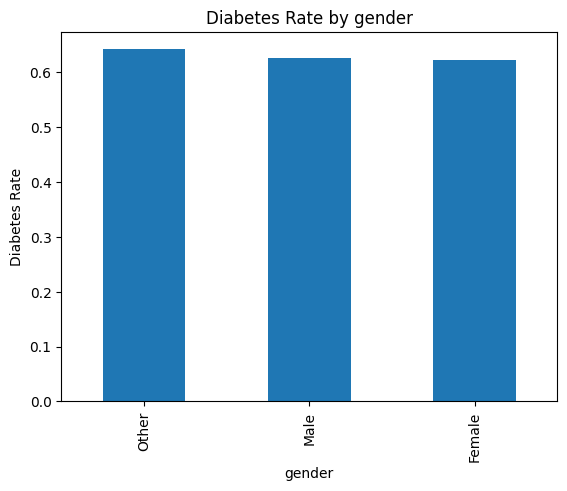

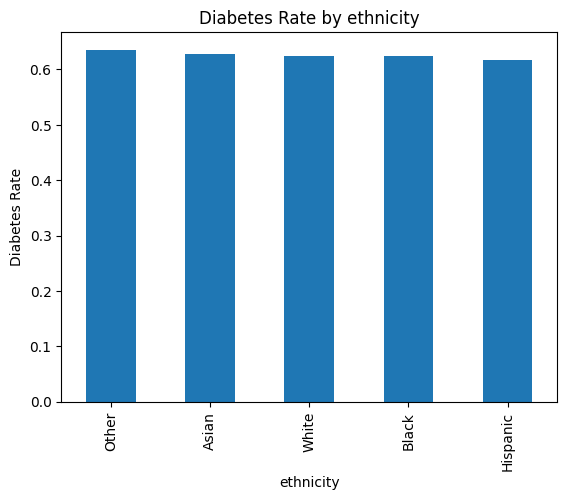

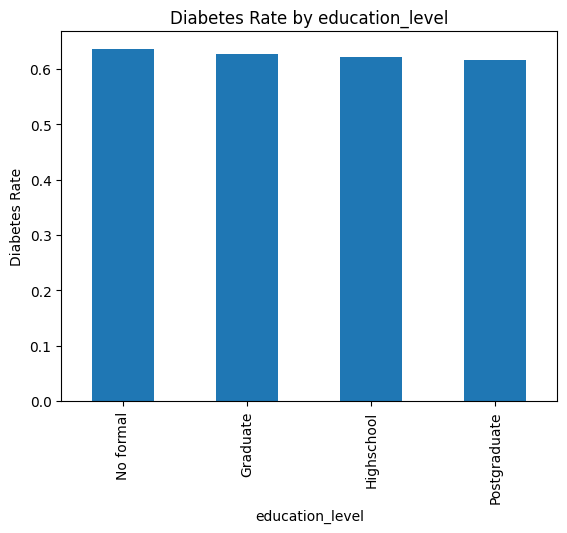

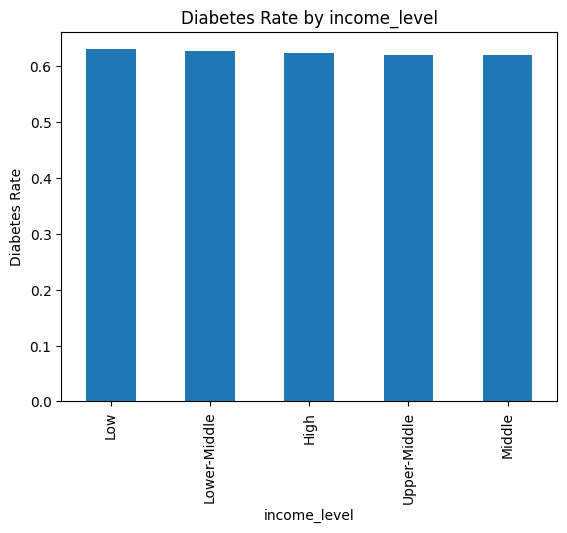

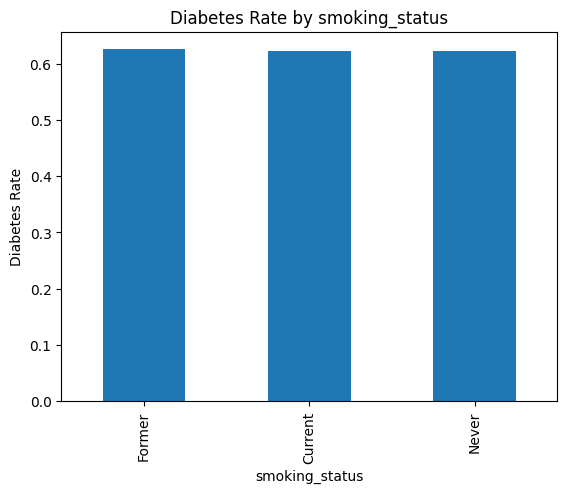

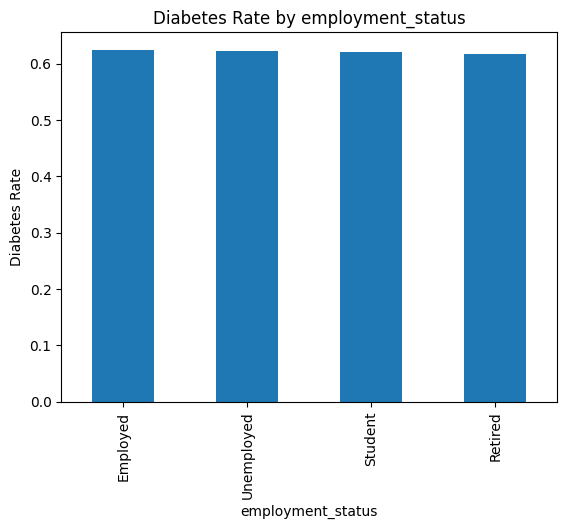

In [7]:
cat_cols = train.select_dtypes(include="object").columns

for col in cat_cols:
    rates = (
        train.groupby(col)["diagnosed_diabetes"]
        .mean()
        .sort_values(ascending=False)
    )

    plt.figure()
    rates.plot(kind="bar")
    plt.title(f"Diabetes Rate by {col}")
    plt.xlabel(col)
    plt.ylabel("Diabetes Rate")
    plt.show()

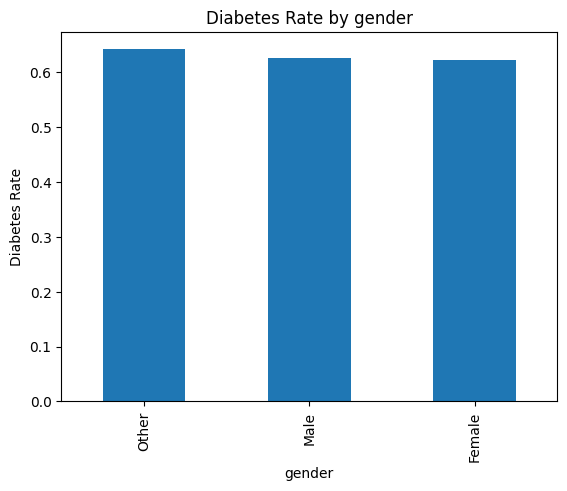

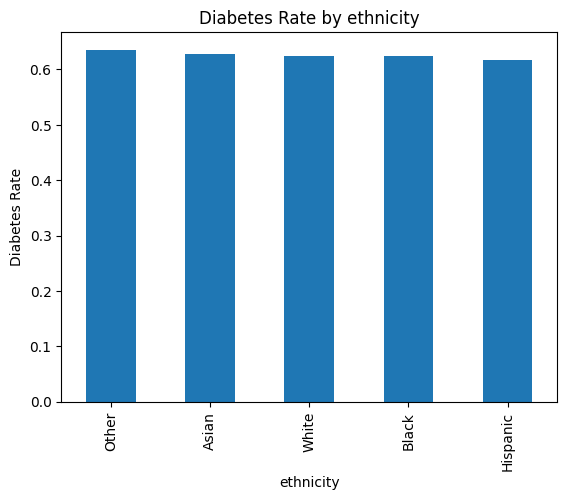

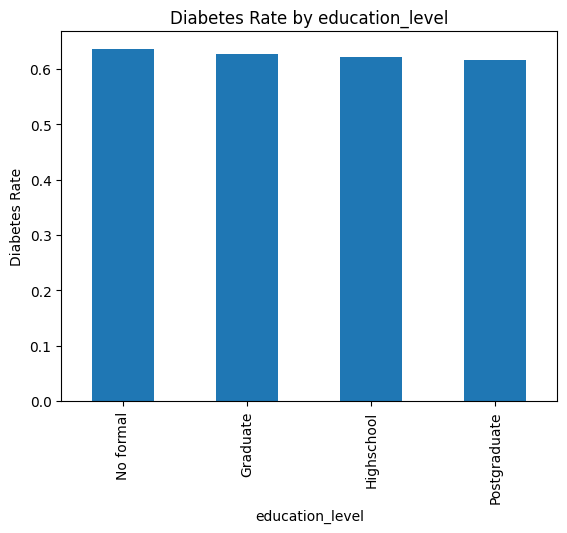

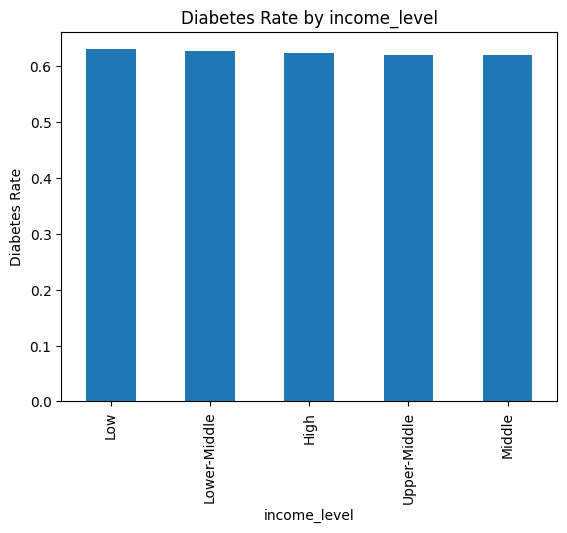

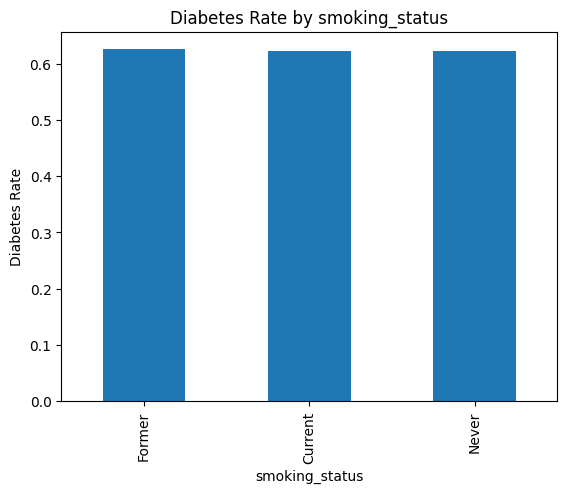

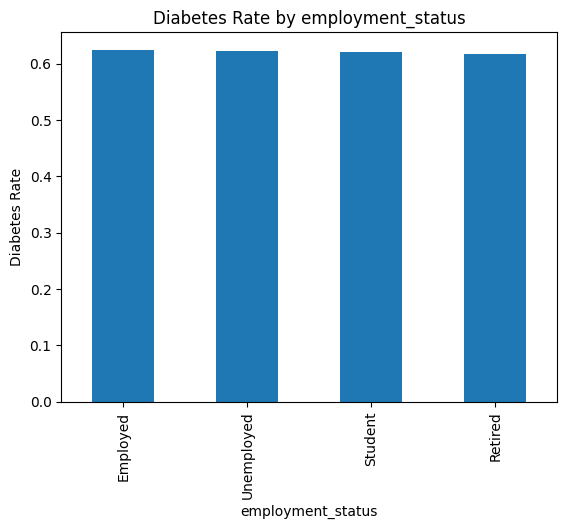

In [8]:
cat_cols = train.select_dtypes(include="object").columns

for col in cat_cols:
    rates = (
        train.groupby(col)["diagnosed_diabetes"]
        .mean()
        .sort_values(ascending=False)
    )

    plt.figure()
    rates.plot(kind="bar")
    plt.title(f"Diabetes Rate by {col}")
    plt.xlabel(col)
    plt.ylabel("Diabetes Rate")
    plt.show()

## 5️⃣ Interaction: Age × BMI 
### Is diabetes risk driven by combinations, not single features?

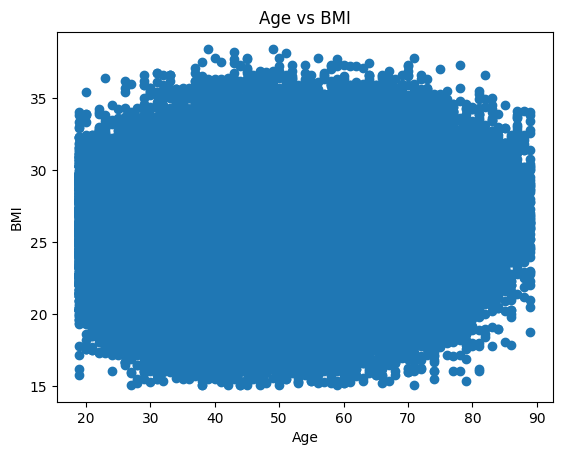

In [9]:
plt.figure()
plt.scatter(train["age"], train["bmi"])
plt.title("Age vs BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

# Preprocess 

In [10]:
TARGET = "diagnosed_diabetes"

num_cols = [
    "age", "bmi", "waist_to_hip_ratio",
    "systolic_bp", "diastolic_bp",
    "triglycerides", "cholesterol_total",
    "hdl_cholesterol", "ldl_cholesterol"
]

binary_cols = [
    "family_history_diabetes",
    "hypertension_history",
    "cardiovascular_history"
]

cat_cols = [
    "gender", "ethnicity",
    "education_level", "income_level",
    "smoking_status", "employment_status"
]

In [11]:
def winsorize(s, p=0.01):
    lower = s.quantile(p)
    upper = s.quantile(1 - p)
    return s.clip(lower, upper)

def preprocess(train, test):
    train = train.copy()
    test = test.copy()

    # Numerical cleanup 
    for col in num_cols:
        train[col] = winsorize(train[col])
        test[col] = winsorize(test[col])

    # Log transform
    for col in ["triglycerides", "cholesterol_total"]:
        train[col] = np.log1p(train[col])
        test[col] = np.log1p(test[col])

    # Interaction features 
    for df in [train, test]:
        #df["age_bmi"] = df["age"] * df["bmi"]
        df["bmi_obese"] = (df["bmi"] >= 30).astype(int)
        #df["fh_obese"] = df["family_history_diabetes"] * df["bmi_obese"]
        df["bmi_triglycerides"] = df["bmi"] * df["triglycerides"]
        #df["bp_ratio"] = df["systolic_bp"] / (df["diastolic_bp"] + 1)

    # Target encoding 
    for col in cat_cols:
        means = train.groupby(col)[TARGET].mean()
        train[col + "_te"] = train[col].map(means)
        test[col + "_te"] = test[col].map(means)

        # unseen categories
        global_mean = train[TARGET].mean()
        test[col + "_te"] = test[col + "_te"].fillna(global_mean)

    # Drop raw categorical columns
    drop_cols = cat_cols
    train.drop(columns=drop_cols, inplace=True)
    test.drop(columns=drop_cols, inplace=True)

    return train, test

In [12]:
# Prepare Data
train_processed, test_processed = preprocess(train, test)

X = train_processed.drop(columns=[TARGET])
y = train_processed[TARGET]


# Modeling

In [13]:
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Train Validation Split
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model = lgb.LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=6,
    num_leaves=48,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_samples=50,
    reg_alpha=1.0,
    reg_lambda=1.0,
    objective="binary",
    random_state=42,
    metric="auc",
    verbosity=-1
)

model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="auc",
    callbacks=[
        early_stopping(stopping_rounds=100, verbose=True),  
        log_evaluation(period=100)  
    ]
)

val_preds = model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, val_preds)
print(f"Validation AUC: {auc:.4f}")

Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.708986
[200]	valid_0's auc: 0.715529
[300]	valid_0's auc: 0.718936
[400]	valid_0's auc: 0.721569
[500]	valid_0's auc: 0.723565
[600]	valid_0's auc: 0.724615
[700]	valid_0's auc: 0.72529
[800]	valid_0's auc: 0.725797
[900]	valid_0's auc: 0.726271
[1000]	valid_0's auc: 0.726588
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.726588
Validation AUC: 0.7266


# Submission

In [14]:
test_preds = model.predict_proba(test_processed)[:, 1]

submission = pd.DataFrame({
    "id": test["id"],  
    "diagnosed_diabetes": test_preds
})

submission.to_csv("submission.csv", index=False)
submission.head()

,id,diagnosed_diabetes
0,700000,0.507826
1,700001,0.670830
2,700002,0.748138
3,700003,0.418191
4,700004,0.922739
